## 加载数据

In [4]:
import pandas as pd

# 加载数据
data = pd.read_csv("polymer_data.csv")
data

,monomer1_fraction,monomer2_fraction,polymerization_temperature,polymerization_time,strength
0,50,50,60,2.0,45
1,70,30,65,1.5,60
2,60,40,70,1.0,50
3,80,20,75,2.5,70
4,65,35,80,2.0,55
...,...,...,...,...,...
74,67,33,58,3.7,63
75,60,40,43,3.3,30
76,73,27,51,3.8,66
77,64,36,57,3.9,52


## 可视化原始数据

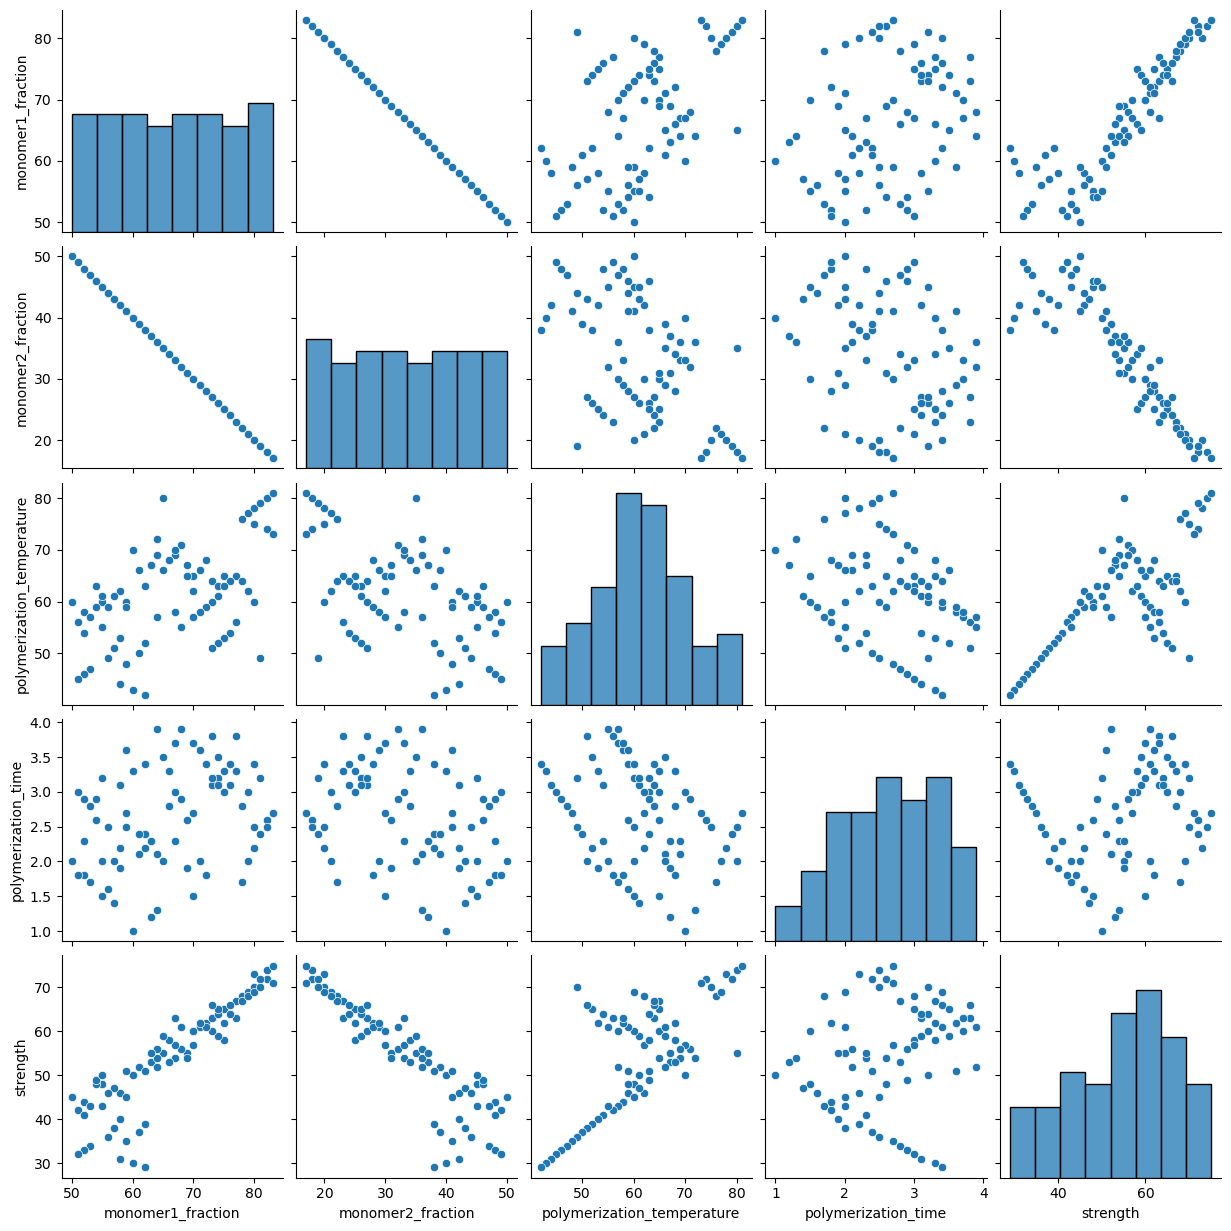

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. 加载数据
data = pd.read_csv("polymer_data.csv")

# 2. 使用seaborn绘制散点图矩阵
sns.pairplot(data)

# 3. 显示图像
plt.show()


## 机器学习：交叉验证、L2正则化、随机梯度下降法、模型评价报告、可视化测试集结果

Evaluation Report:
-------------------
Best alpha: 0.1
Mean Squared Error (MSE): 16.133121759794125
Root Mean Squared Error (RMSE): 4.016605751103054
R^2 Score: 0.9018680549692947


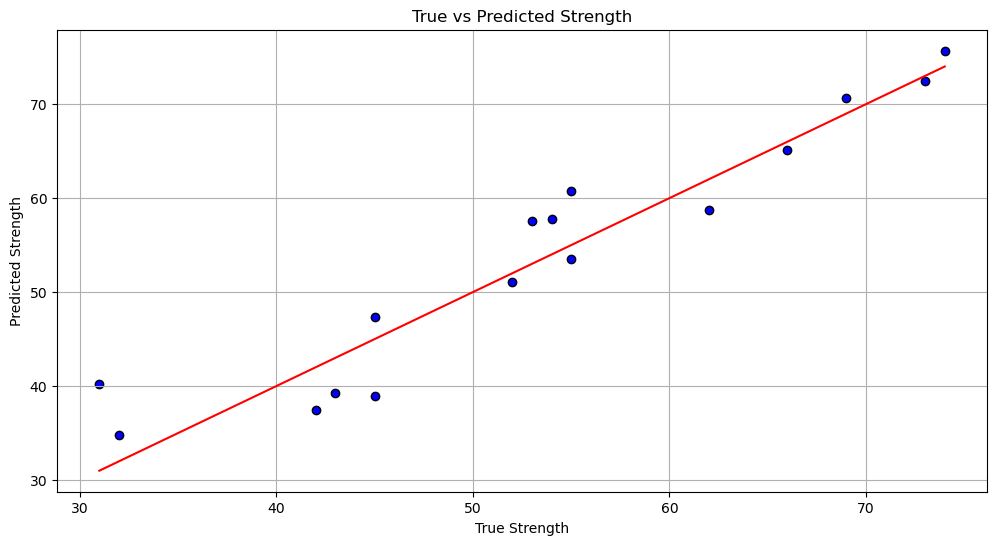

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 数据加载
data = pd.read_csv("polymer_data.csv")
X = data.drop("strength", axis=1)
y = data["strength"]

# 2. 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. 交叉验证与模型训练
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.logspace(-6, 6, 13)  # Regularization strengths
sgd_scores = []

for alpha in alphas:
    sgd_regressor = SGDRegressor(penalty='l2', alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)
    scores = cross_val_score(sgd_regressor, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    sgd_scores.append(np.mean(scores))

best_alpha = alphas[np.argmax(sgd_scores)]
sgd_best = SGDRegressor(penalty='l2', alpha=best_alpha, max_iter=1000, tol=1e-3, random_state=42)
sgd_best.fit(X_train_scaled, y_train)

# 4. 预测与评价
y_pred = sgd_best.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Report:")
print("-------------------")
print(f"Best alpha: {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# 5. 可视化测试集结果
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.title("True vs Predicted Strength")
plt.xlabel("True Strength")
plt.ylabel("Predicted Strength")
plt.grid(True)
plt.show()